# Building Audio Sample Feature Datasets



In [72]:
import soundcloud
import urllib 
import urllib.request
import os
from pydub import AudioSegment
from pathlib import Path

import urllib.request


# create client with access token
client = soundcloud.Client(client_id='d74966a45a69cd502a72686704fefaab', client_secret='c006777d92bad381ac00244db9997aab')




In [ ]:

list_of_tracks = [
    'https://soundcloud.com/freesongstouse/jjd-marin-hoxha-lift'
]

def mkdirs_safe(path):
    try:
        os.makedirs(path) 
    except Exception:
        pass

mkdirs_safe('../data/processed/sc/')
mkdirs_safe('../data/raw/sc/')

list_of_wav_files = []

for track_url in list_of_tracks: 
    # resolve track URL into track resource
    track = client.get('/resolve', url=track_url)
    print('GETTING /tracks/%d'%track.id)
    track = client.get('/tracks/%d'%track.id)
    track_loc = "../data/raw/sc/%d.mp3"%track.id
    
    print(track.stream_url)
    
    track_path = Path(track_loc)
    
    if not track_path.is_file():

        # get the tracks streaming URL
        stream_url = client.get(track.stream_url, allow_redirects=False)
        
        
        print("Loading sound %s %s"%(stream_url.location,track_loc))
        urllib.request.urlretrieve(stream_url.location, track_loc)
        # print the tracks stream URL
        print(track_loc, " is created")
    else:
        print(track_loc, " already existed")
    
    wav_loc = "../data/processed/sc/%d.wav"%track.id
    wav_path = Path(wav_loc)
    
    if not wav_path.is_file():
        print("Processing mp3 to wav")
        sound = AudioSegment.from_mp3(track_loc)
        sound.export(wav_loc, format="wav")
        list_of_wav_files.append(wav_loc)
        print("Processing completed")
    else:
        print("Wav already exists")




GETTING /tracks/324758087
https://api.soundcloud.com/tracks/324758087/stream
Loading sound https://cf-media.sndcdn.com/phAbn2Aes9qE.128.mp3?Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiKjovL2NmLW1lZGlhLnNuZGNkbi5jb20vcGhBYm4yQWVzOXFFLjEyOC5tcDMiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE0OTYwOTMwMzR9fX1dfQ__&Signature=q8IzaQknIWAYRt78riVEaKYQJHN7ZK8RWH3xA5NH0-woDnyPIY73kNOnV6GDxLwFo072jEOfIVi0fu-shLXCOsoc3OL90e42SKYfeokwsNg3y9XPvJidYTkohzuqo4iCkg4QHMUjd5uZmwOHMVNl3nOxEatxA4d6n28BsgQtlPmvXfEINmBXNHa63Ppn9UfJOUbw-SLslbkJ~sMh5FmEAJJx-RZhS7vFZttLs0BkTGUBZnWmL7V7ZBomKQPX7Y7MGQMP7ML4hHZi4tqbPNWQNQ1AdqzChIlLWB6KpN7~SvmU3JodRlbBzX86oY10C5bOhLhgwZS-nIahk8flnLMcVw__&Key-Pair-Id=APKAJAGZ7VMH2PFPW6UQ ../data/raw/sc/324758087.mp3


In [ ]:
import wave
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
%matplotlib inline 

# read audio samples
input_data = read('../data/processed/sc/194510401.wav')
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:20000])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sound Wav")
# display the plot
plt.show()

In [45]:
%cd /Users/kthakore/Documents/musigan
from src.pyAudioAnalysis import audioAnalysis
from src.pyAudioAnalysis import audioBasicIO

/Users/kthakore/Documents/musigan


TypeError: 'float' object cannot be interpreted as an integer

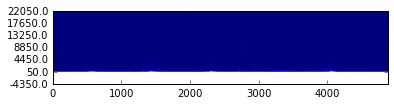

In [66]:
spectogram = audioAnalysis.fileSpectrogramWrapper('data/processed/sound.wav')

In [67]:
audioBasicIO.readAudioFile('data/processed/sound.wav')

(44100, array([[0, 0],
        [0, 0],
        [0, 0],
        ..., 
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int16))

In [68]:

# We'll need numpy for some mathematical operations
import numpy as np


# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [69]:
y, sr = librosa.load('data/processed/sound.wav')

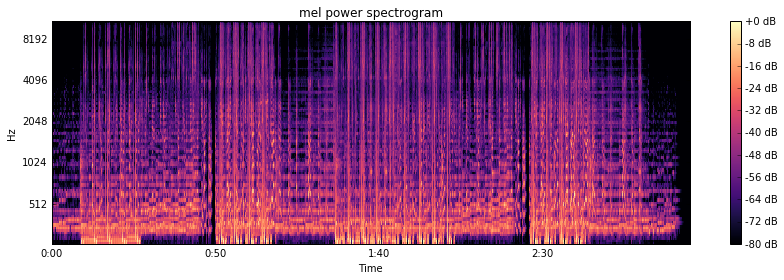

In [70]:
y, sr = librosa.load('data/processed/sound.wav')
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()


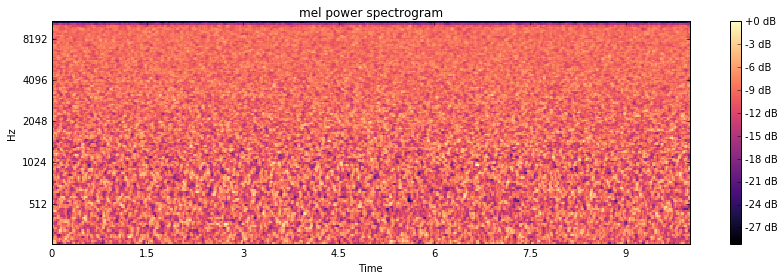

In [71]:
y, sr = librosa.load('data/processed/rand_sample.wav')
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()